# Load the dataset

In [13]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


# Preprocess the dataset

In [2]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)


# Create the model

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_size = X_train.shape[1]
latent_size = 64

input_layer = Input(shape=(input_size,))
encoder = Dense(units=latent_size, activation='relu')(input_layer)
decoder = Dense(units=input_size, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [4]:
autoencoder.compile(optimizer='adam', loss='mse')

# Define the early stopping callback

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Fit the model

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping]).history

Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0596 - val_loss: 0.0163
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0140 - val_loss: 0.0088
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0079 - val_loss: 0.0062
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 6/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 7/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 8/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 9/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 10/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 11/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 12/100
844/844 ━━━━━━━━━━━━━━━━━━━━

# Evaluate the model

In [10]:
loss = autoencoder.evaluate(X_test, X_test, batch_size=64)

print(f"Test loss: {loss:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037
Test loss: 0.0035


# Make predictions

In [11]:
predictions = autoencoder.predict(X_test, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step


# Visualize the results

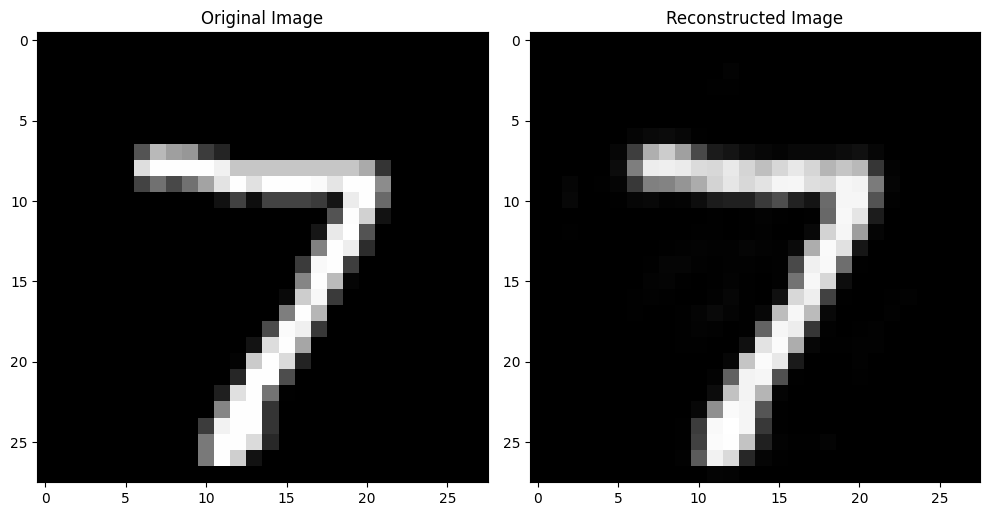

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].imshow(X_test[0].reshape(28, 28), cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(predictions[0].reshape(28, 28), cmap='gray')
axes[1].set_title('Reconstructed Image')

plt.tight_layout()
plt.show()